Simulating for β=0.6588, ε=3.9374, V=1000


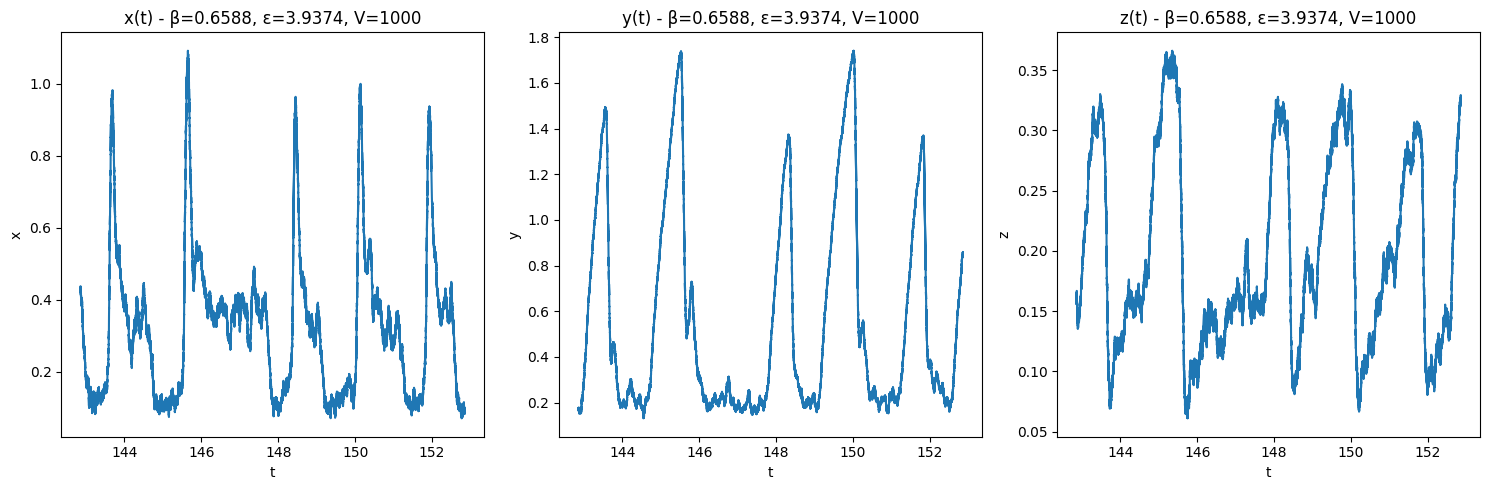

Simulation and plotting complete.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Define the parameters
    # Define the parameters
V0, V1, V4 = 2, 2, 2.5
kf, k = 1, 10
VM2, k2 = 6, 0.1
VM3, m = 20, 4
kx, ky, kz = 0.3, 0.2, 0.1
VM5, k5 = 30, 1
kd, p, n = 0.6, 1, 2

# Define parameters
dt = 1e-6
tmax = 200
Nn = round(tmax / dt)

# Time array
tT = np.arange(0, tmax + dt, dt)

@njit
def solve_system(beta, epsilon, V):
    # Random variates
    xi = [np.random.normal(0, np.sqrt(dt), Nn) for _ in range(12)]
    # Initial conditions
    x = np.ones(Nn + 1)
    y = np.ones(Nn + 1)
    z = np.ones(Nn + 1)
    # Euler discretization
    for i in range(Nn):
        V2 = VM2 * x[i]**2 / (k2**2 + x[i]**2)
        V3 = VM3 * x[i]**m / (kx**m + x[i]**m) * y[i]**2 / (ky**2 + y[i]**2) * z[i]**4 / (kz**4 + z[i]**4)
        V5 = VM5 * z[i]**p / (k5**p + z[i]**p) * x[i]**n / (kd**n + x[i]**n)
        x[i + 1] = (x[i] + (V0 + V1 * beta - k * x[i] - V2 + kf * y[i] + V3) * dt + 1 / np.sqrt(V) * (np.sqrt(V0) * xi[0][i] + np.sqrt(V1 * beta) * xi[1][i] - np.sqrt(V2) * xi[2][i] + np.sqrt(V3) * xi[3][i] + np.sqrt(kf * y[i]) * xi[4][i] - np.sqrt(k) * xi[5][i]))
        y[i + 1] = (y[i] + (V2 - kf * y[i] - V3) * dt + 1 / np.sqrt(V) * (np.sqrt(V2) * xi[6][i] - np.sqrt(V3) * xi[7][i] - np.sqrt(kf * y[i]) * xi[8][i]))
        z[i + 1] = (z[i] + (V4 * beta - epsilon * z[i] - V5) * dt + 1 / np.sqrt(V) * (np.sqrt(V4 * beta) * xi[9][i] - np.sqrt(V5) * xi[10][i] - np.sqrt(epsilon * z[i]) * xi[11][i]))
    return x, y, z

def generate_data(beta, epsilon, V):
    print(f"Simulating for β={beta:.4f}, ε={epsilon:.4f}, V={V}")
    x, y, z = solve_system(beta, epsilon, V)
    return x, y, z

def plot_data(x, y, z, beta, epsilon, V, plot_duration=10):
    # Calculate the number of points for 10 seconds
    points_to_plot = int(plot_duration / dt)
    
    # Select a random starting point for the 10-second window
    start_index = np.random.randint(0, len(tT) - points_to_plot)
    end_index = start_index + points_to_plot
    
    t_plot = tT[start_index:end_index]
    x_plot = x[start_index:end_index]
    y_plot = y[start_index:end_index]
    z_plot = z[start_index:end_index]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.plot(t_plot, x_plot)
    plt.title(f'x(t) - β={beta:.4f}, ε={epsilon:.4f}, V={V}')
    plt.xlabel('t')
    plt.ylabel('x')
    
    plt.subplot(132)
    plt.plot(t_plot, y_plot)
    plt.title(f'y(t) - β={beta:.4f}, ε={epsilon:.4f}, V={V}')
    plt.xlabel('t')
    plt.ylabel('y')
    
    plt.subplot(133)
    plt.plot(t_plot, z_plot)
    plt.title(f'z(t) - β={beta:.4f}, ε={epsilon:.4f}, V={V}')
    plt.xlabel('t')
    plt.ylabel('z')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load data and get the first pair of beta and epsilon
    #data = np.loadtxt('./data_set/EpsilonBeta/BurstingPoints.dat')
    data = np.loadtxt('./data_set/EpsilonBeta/SSSPoints.dat')
    beta, epsilon = data[0]  # Get the first pair
    V = 1000

    x, y, z = generate_data(beta, epsilon, V)
    plot_data(x, y, z, beta, epsilon, V)
    print('Simulation and plotting complete.')
